In [1]:
import os
import copy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
all_hr_sig = np.load('temp/GM12878_ATAC_H3K27ac_H3K4me3_2_100_all_hr_sig.npy', allow_pickle=True).item()

GM12878_ATAC_H3K27ac_H3K4me3_2_100_all_enhanced_sig = np.load('temp/GM12878_ATAC_H3K27ac_H3K4me3_2_100_all_enhanced_sig.npy', allow_pickle=True).item()
GM12878_ATAC_H3K27ac_2_100_all_enhanced_sig = np.load('temp/GM12878_ATAC_H3K27ac_2_100_all_enhanced_sig.npy', allow_pickle=True).item()
GM12878_ATAC_H3K4me3_2_100_all_enhanced_sig = np.load('temp/GM12878_ATAC_H3K4me3_2_100_all_enhanced_sig.npy', allow_pickle=True).item()
GM12878_ATAC_H3K27me3_2_100_all_enhanced_sig = np.load('represses/temp/GM12878_ATAC_H3K27me3_2_100_all_enhanced_sig.npy', allow_pickle=True).item()

GM12878_ATAC_H3K27ac_H3K4me3_2_300_all_enhanced_sig = np.load('temp/GM12878_ATAC_H3K27ac_H3K4me3_2_300_all_enhanced_sig.npy', allow_pickle=True).item()
GM12878_ATAC_H3K27ac_2_300_all_enhanced_sig = np.load('temp/GM12878_ATAC_H3K27ac_2_300_all_enhanced_sig.npy', allow_pickle=True).item()
GM12878_ATAC_H3K4me3_2_300_all_enhanced_sig = np.load('temp/GM12878_ATAC_H3K4me3_2_300_all_enhanced_sig.npy', allow_pickle=True).item()

colors = [
    (51/255, 160/255, 44/255),  # 绿
    (166/255, 206/255, 227/255),
    (102/255, 102/255, 102/255),
    (177/255, 89/255, 40/255)  # 红
]


In [3]:
attentions = 50
center = attentions - 1

def read_chiqseq_file(path):
    _peaks = dict()
    with open(path)as f:
        for line in f:
            datas = line.strip().split()
            left, right = int(int(datas[1])/1000), int(int(datas[2])/1000)
            peaks = list(range(left, right+1))
            if datas[0] not in _peaks.keys():
                _peaks[datas[0]] = set()
            for i in peaks:
                _peaks[datas[0]].add(i)
    return _peaks

def get_hit_indicators(significants, peaks):
    distance = np.zeros(attentions*2-1)
    
    for sig in significants:
        x, y = int(sig[0]), int(sig[1])
        for i in range(attentions):
            if (x+i) in peaks or (y+i) in peaks:
                distance[center-i] += 1
            if i != 0 and((x-i) in peaks or (y-i) in peaks):
                distance[center+i] += 1
            if (x+i) in peaks or (x-i) in peaks or (y+i) in peaks or (y-i) in peaks:
                break
    return distance

def show(x, mine_results: dict, hr_result, colors_map, title):
    sns.set_style("whitegrid") 
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5, 5), sharey=True)
    axes.grid(False)
    for key in mine_results.keys():
        axes.plot(x, mine_results[key], color=colors_map[key], label=key)
    axes.plot(x, hr_result, color=colors[3], label='hr')

    plt.xlabel('distance')
    plt.ylabel('nums')
    plt.legend(loc='lower right')
    plt.title(title)
    plt.show()

def figure(chip_seq_path, colors_map, title):
    all_enhanced_results = copy.deepcopy(colors_map)
    for key in all_enhanced_results.keys():
        all_enhanced_results[key] = np.zeros(attentions*2-1)
    all_hr_result = np.zeros(attentions*2-1)

    for chr in range(1, 23):
        _peaks = read_chiqseq_file(chip_seq_path)
        hr_result = get_hit_indicators(all_hr_sig[chr], _peaks['chr{}'.format(chr)])
        for key in all_enhanced_results.keys():
            enhanced_result = get_hit_indicators(all_enhanced_sig[key][chr], _peaks['chr{}'.format(chr)])
            all_enhanced_results[key] += enhanced_result
        all_hr_result += hr_result

    show(list(range(-attentions+1, attentions)), all_enhanced_results, all_hr_result, colors_map, title)

In [4]:
all_enhanced_sig = dict(
    H3K27ac_H3K4me3=GM12878_ATAC_H3K27ac_H3K4me3_2_100_all_enhanced_sig,
    H3K27ac=GM12878_ATAC_H3K27ac_2_100_all_enhanced_sig,
    H3K4me3=GM12878_ATAC_H3K4me3_2_100_all_enhanced_sig,
    H3K27me3=GM12878_ATAC_H3K27me3_2_100_all_enhanced_sig
)
auxiliary_files_path = os.path.join(
    '/data1/lmh_data/MINE/GM12878_ATAC_H3K27ac_H3K4me3/analyse/GM12878_ATAC_H3K27ac_H3K4me3',
    'experiment', 'auxiliary_files')

In [5]:
colors_map = dict(
    H3K27ac_H3K4me3=colors[0],
    H3K27ac=colors[1],
    H3K4me3=colors[2]
)

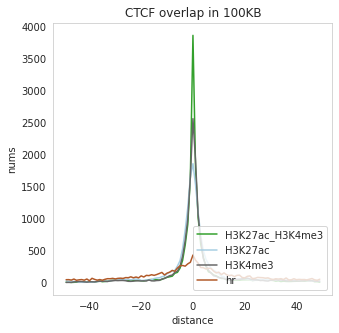

In [6]:
chip_seq_path = os.path.join(auxiliary_files_path, 'CTCF_peaks.bed')
figure(chip_seq_path, colors_map, 'CTCF overlap in 100KB')

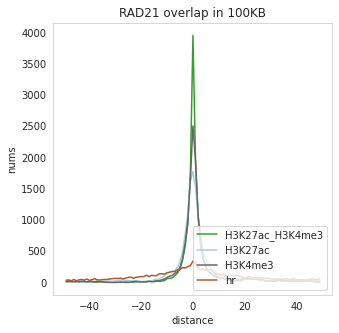

In [7]:
chip_seq_path = os.path.join(auxiliary_files_path, 'RAD21_peaks.bed')
figure(chip_seq_path, colors_map, 'RAD21 overlap in 100KB')

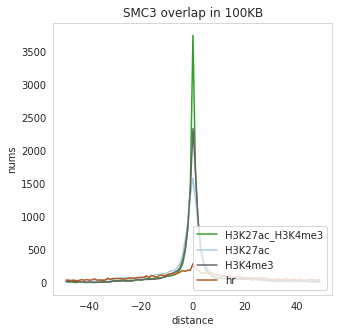

In [8]:
chip_seq_path = os.path.join(auxiliary_files_path, 'SMC3_peaks.bed')
figure(chip_seq_path, colors_map, 'SMC3 overlap in 100KB')

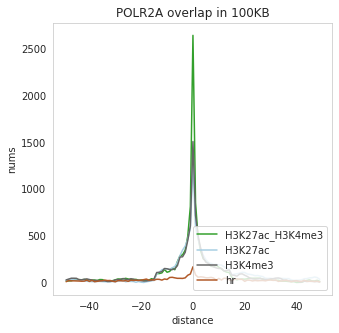

In [9]:
chip_seq_path = os.path.join(auxiliary_files_path, 'POLR2A_peaks.bed')
figure(chip_seq_path, colors_map, 'POLR2A overlap in 100KB')

In [10]:
all_enhanced_sig = dict(
    H3K27ac_H3K4me3=GM12878_ATAC_H3K27ac_H3K4me3_2_300_all_enhanced_sig,
    H3K27ac=GM12878_ATAC_H3K27ac_2_300_all_enhanced_sig,
    H3K4me3=GM12878_ATAC_H3K4me3_2_300_all_enhanced_sig
)
auxiliary_files_path = os.path.join(
    '/data1/lmh_data/MINE/GM12878_ATAC_H3K27ac_H3K4me3/analyse/GM12878_ATAC_H3K27ac_H3K4me3',
    'experiment', 'auxiliary_files')

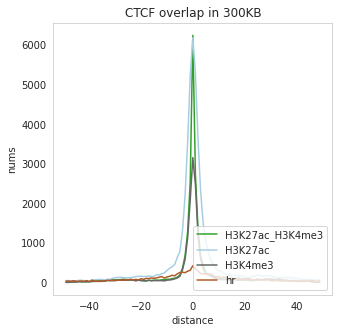

In [11]:
chip_seq_path = os.path.join(auxiliary_files_path, 'CTCF_peaks.bed')
figure(chip_seq_path, colors_map, 'CTCF overlap in 300KB')

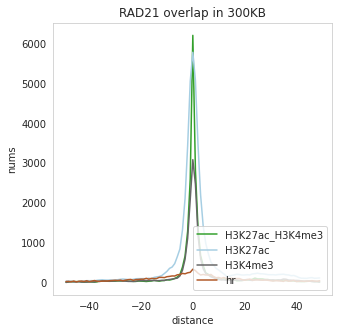

In [12]:
chip_seq_path = os.path.join(auxiliary_files_path, 'RAD21_peaks.bed')
figure(chip_seq_path, colors_map, 'RAD21 overlap in 300KB')

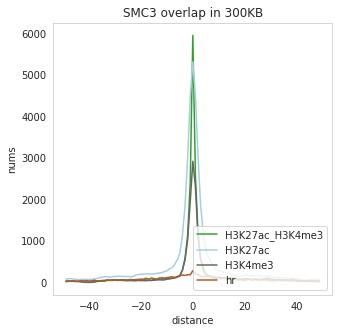

In [13]:
chip_seq_path = os.path.join(auxiliary_files_path, 'SMC3_peaks.bed')
figure(chip_seq_path, colors_map, 'SMC3 overlap in 300KB')

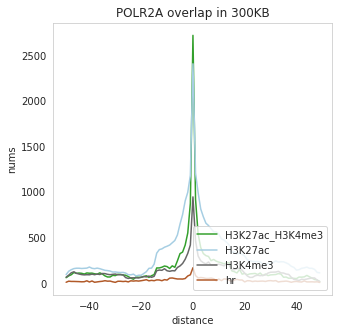

In [14]:
chip_seq_path = os.path.join(auxiliary_files_path, 'POLR2A_peaks.bed')
figure(chip_seq_path, colors_map, 'POLR2A overlap in 300KB')

In [15]:
all_enhanced_sig = dict(
    H3K27ac_H3K4me3=GM12878_ATAC_H3K27ac_H3K4me3_2_100_all_enhanced_sig,
    H3K27me3=GM12878_ATAC_H3K27me3_2_100_all_enhanced_sig
)
auxiliary_files_path = '/data1/lmh_data/MINE/source/GM12878'

colors_map = dict(
    H3K27ac_H3K4me3=colors[0],
    H3K27me3=colors[1]
)

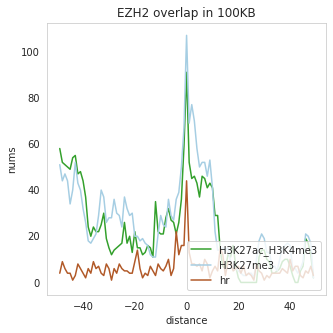

In [16]:
chip_seq_path = os.path.join(auxiliary_files_path, 'EZH2_peaks.bed')
figure(chip_seq_path, colors_map, 'EZH2 overlap in 100KB')